In [1]:
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [3]:
df = pd.read_csv(r'C:\Users\sylvia.pereira\OneDrive - alteryx.com\Desktop\Dataset_EDA_Combined_4.csv')
df.head()

,ID_Student,course_year_month,pass_course,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,560374,GGG 2013_October,True,0,0,0,0,0,0,51,...,0,0,0,0,65,0,5,0,8,0
1,519684,EEE 2013_October,True,0,2,0,0,525,0,706,...,0,193,0,0,371,0,77,0,215,60
2,570529,GGG 2013_October,True,0,0,0,0,45,2,275,...,0,0,0,0,158,0,77,0,15,0
3,643653,FFF 2014_October,True,0,0,0,0,411,0,470,...,0,14,5,19,1001,0,20,0,254,37
4,678680,BBB 2014_October,True,0,0,0,0,109,4,235,...,0,0,0,0,118,0,84,0,26,0


In [4]:
result = df.dtypes
print(result)

ID_Student            int64
course_year_month    object
pass_course            bool
dataplus              int64
dualpane              int64
externalquiz          int64
folder                int64
forumng               int64
glossary              int64
homepage              int64
htmlactivity          int64
oucollaborate         int64
oucontent             int64
ouelluminate          int64
ouwiki                int64
page                  int64
questionnaire         int64
quiz                  int64
repeatactivity        int64
resource              int64
sharedsubpage         int64
subpage               int64
url                   int64
dtype: object


In [5]:
df['ID_Student'] = df['ID_Student'].astype('object')

# Removing fields that contain more than 70% zeros

In [6]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  ID_Student  is :  0
Count of zeros in column  course_year_month  is :  0
Count of zeros in column  pass_course  is :  6719
Count of zeros in column  dataplus  is :  16897
Count of zeros in column  dualpane  is :  16016
Count of zeros in column  externalquiz  is :  15459
Count of zeros in column  folder  is :  17309
Count of zeros in column  forumng  is :  1303
Count of zeros in column  glossary  is :  14467
Count of zeros in column  homepage  is :  15
Count of zeros in column  htmlactivity  is :  17850
Count of zeros in column  oucollaborate  is :  10954
Count of zeros in column  oucontent  is :  1036
Count of zeros in column  ouelluminate  is :  17047
Count of zeros in column  ouwiki  is :  10554
Count of zeros in column  page  is :  12578
Count of zeros in column  questionnaire  is :  15593
Count of zeros in column  quiz  is :  4833
Count of zeros in column  repeatactivity  is :  19075
Count of zeros in column  resource  is :  510
Count of zeros in column  s

In [7]:
df_drop = df.drop(columns=df.columns[df.eq(0).mean()>=0.70])
#Remove columns with 90% or higher number of zeros.
#These features will not offer any help to our model.
#Let's go through it step by step:
#The df.eq(0) returns True \ False in each cell.
#The .mean() method treats True as 1 and False as 0, so comparing that mean to 0.9 is what you want.
#Calling df.columns[...] at these places will return only those where the >0.9 holds, and drop just drops them.
df_drop.head()

,ID_Student,course_year_month,pass_course,forumng,homepage,oucollaborate,oucontent,ouwiki,page,quiz,resource,subpage,url
0,560374,GGG 2013_October,True,0,51,0,50,0,0,65,5,8,0
1,519684,EEE 2013_October,True,525,706,0,1788,193,0,371,77,215,60
2,570529,GGG 2013_October,True,45,275,0,628,0,0,158,77,15,0
3,643653,FFF 2014_October,True,411,470,9,964,14,5,1001,20,254,37
4,678680,BBB 2014_October,True,109,235,26,478,0,0,118,84,26,0


# Scaling Numeric Data

In [8]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_ready = df_drop.copy()

scaler = StandardScaler()
num_cols = ['forumng', 'homepage', 'oucollaborate', 'oucontent', 'ouwiki', 'page', 'quiz', 'resource', 'subpage', 'url']
df_ready[num_cols] = scaler.fit_transform(df_ready[num_cols])

df_ready.head()

,ID_Student,course_year_month,pass_course,forumng,homepage,oucollaborate,oucontent,ouwiki,page,quiz,resource,subpage,url
0,560374,GGG 2013_October,True,-0.502551,-0.671838,-0.369840,-0.600548,-0.416769,-0.412160,-0.457704,-0.462467,-0.745368,-0.602864
1,519684,EEE 2013_October,True,0.322001,1.135579,-0.369840,1.798085,1.593049,-0.412160,0.097396,0.283051,0.357741,0.886431
2,570529,GGG 2013_October,True,-0.431875,-0.053729,-0.369840,0.197156,-0.416769,-0.412160,-0.288997,0.283051,-0.708065,-0.602864
3,643653,FFF 2014_October,True,0.142955,0.484357,0.326352,0.660874,-0.270979,0.387342,1.240249,-0.307151,0.565574,0.315535
4,678680,BBB 2014_October,True,-0.331358,-0.164106,1.641380,-0.009860,-0.416769,-0.412160,-0.361559,0.355531,-0.649445,-0.602864


# Feature Selection

## Filter Method
### In this method you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

In [9]:
cor=df_ready.corr()
cor

,pass_course,forumng,homepage,oucollaborate,oucontent,ouwiki,page,quiz,resource,subpage,url
pass_course,1.000000,0.203948,0.295290,0.156591,0.264943,0.174393,0.091318,0.210180,0.153820,0.245619,0.201365
forumng,0.203948,1.000000,0.731877,0.221122,0.239202,0.230668,0.156718,0.221318,0.191994,0.383362,0.418783
homepage,0.295290,0.731877,1.000000,0.301454,0.533206,0.362058,0.350026,0.463731,0.332555,0.687295,0.633643
oucollaborate,0.156591,0.221122,0.301454,1.000000,0.126064,0.116357,0.032593,0.108873,0.219304,0.335250,0.191467
oucontent,0.264943,0.239202,0.533206,0.126064,1.000000,0.275083,0.616742,0.530083,0.155628,0.569371,0.350041
ouwiki,0.174393,0.230668,0.362058,0.116357,0.275083,1.000000,0.056819,0.166998,0.160084,0.248239,0.436978
page,0.091318,0.156718,0.350026,0.032593,0.616742,0.056819,1.000000,0.462047,0.106484,0.526778,0.240914
quiz,0.210180,0.221318,0.463731,0.108873,0.530083,0.166998,0.462047,1.000000,0.209464,0.518357,0.238911
resource,0.153820,0.191994,0.332555,0.219304,0.155628,0.160084,0.106484,0.209464,1.000000,0.372256,0.253894
subpage,0.245619,0.383362,0.687295,0.335250,0.569371,0.248239,0.526778,0.518357,0.372256,1.000000,0.544838


<AxesSubplot:>

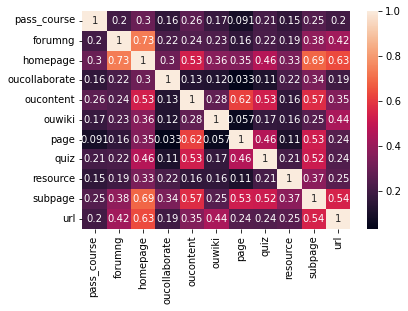

In [10]:
plt.figure()
sns.heatmap(cor,annot=True)

## Filter Method

In [11]:
threshold = 0.7
def trimm_correlated(df_ready, threshold):
    df_corr = df_ready.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_ready[un_corr_idx]
    return df_out

In [12]:
df2 = trimm_correlated(df_ready, 0.7)

In [13]:
cor=df2.corr()
cor

,pass_course,forumng,oucollaborate,oucontent,ouwiki,page,quiz,resource,subpage,url
pass_course,1.000000,0.203948,0.156591,0.264943,0.174393,0.091318,0.210180,0.153820,0.245619,0.201365
forumng,0.203948,1.000000,0.221122,0.239202,0.230668,0.156718,0.221318,0.191994,0.383362,0.418783
oucollaborate,0.156591,0.221122,1.000000,0.126064,0.116357,0.032593,0.108873,0.219304,0.335250,0.191467
oucontent,0.264943,0.239202,0.126064,1.000000,0.275083,0.616742,0.530083,0.155628,0.569371,0.350041
ouwiki,0.174393,0.230668,0.116357,0.275083,1.000000,0.056819,0.166998,0.160084,0.248239,0.436978
page,0.091318,0.156718,0.032593,0.616742,0.056819,1.000000,0.462047,0.106484,0.526778,0.240914
quiz,0.210180,0.221318,0.108873,0.530083,0.166998,0.462047,1.000000,0.209464,0.518357,0.238911
resource,0.153820,0.191994,0.219304,0.155628,0.160084,0.106484,0.209464,1.000000,0.372256,0.253894
subpage,0.245619,0.383362,0.335250,0.569371,0.248239,0.526778,0.518357,0.372256,1.000000,0.544838
url,0.201365,0.418783,0.191467,0.350041,0.436978,0.240914,0.238911,0.253894,0.544838,1.000000


## Embedded Method

### This method takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Features with coefficient = 0 are removed and the rest are taken.

In [14]:
df2.head()

,pass_course,forumng,oucollaborate,oucontent,ouwiki,page,quiz,resource,subpage,url
0,True,-0.502551,-0.369840,-0.600548,-0.416769,-0.412160,-0.457704,-0.462467,-0.745368,-0.602864
1,True,0.322001,-0.369840,1.798085,1.593049,-0.412160,0.097396,0.283051,0.357741,0.886431
2,True,-0.431875,-0.369840,0.197156,-0.416769,-0.412160,-0.288997,0.283051,-0.708065,-0.602864
3,True,0.142955,0.326352,0.660874,-0.270979,0.387342,1.240249,-0.307151,0.565574,0.315535
4,True,-0.331358,1.641380,-0.009860,-0.416769,-0.412160,-0.361559,0.355531,-0.649445,-0.602864


In [15]:
X = df2.drop('pass_course',1)
y = df2['pass_course']

In [16]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X,y)
print('Besy alpha using built-in LassoCV: %f' % reg.alpha_)
print('Besy score using built-in LassoCV: %f' % reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Besy alpha using built-in LassoCV: 0.002726
Besy score using built-in LassoCV: 0.124588


In [17]:
print ('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminated the other ' + str(sum(coef == 0)) + ' variables.')

Lasso picked 9 variables and eliminated the other 0 variables.


In [18]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_final = df2.copy()

scaler = StandardScaler()
num_cols = ['forumng', 'oucollaborate', 'oucontent', 'ouwiki', 'page', 'quiz', 'resource','subpage', 'url']
df_final[num_cols] = scaler.fit_transform(df2[num_cols])

df_final.head()

,pass_course,forumng,oucollaborate,oucontent,ouwiki,page,quiz,resource,subpage,url
0,True,-0.502551,-0.369840,-0.600548,-0.416769,-0.412160,-0.457704,-0.462467,-0.745368,-0.602864
1,True,0.322001,-0.369840,1.798085,1.593049,-0.412160,0.097396,0.283051,0.357741,0.886431
2,True,-0.431875,-0.369840,0.197156,-0.416769,-0.412160,-0.288997,0.283051,-0.708065,-0.602864
3,True,0.142955,0.326352,0.660874,-0.270979,0.387342,1.240249,-0.307151,0.565574,0.315535
4,True,-0.331358,1.641380,-0.009860,-0.416769,-0.412160,-0.361559,0.355531,-0.649445,-0.602864


Text(0.5, 1.0, 'Feature importance using Lasso Model')

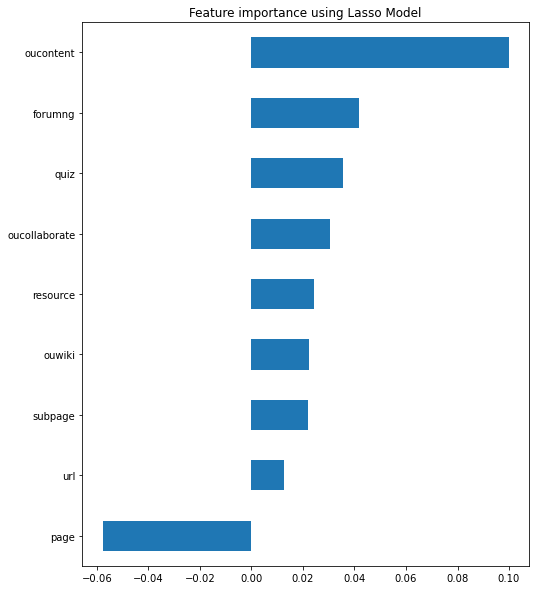

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title ('Feature importance using Lasso Model')

In [20]:
# Select Features
feature = df_final.drop('pass_course', axis=1)

# Select Target
target = df_final['pass_course']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (15261, 9)
Shape of testing feature: (3816, 9)
Shape of training label: (15261,)
Shape of training label: (3816,)


In [21]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Building Models

### Decision Tree Model

In [22]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

In [24]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7382075471698113
Precision: 0.8070898598516076
Recall: 0.786661309762957
F1 Score: 0.7967446592065106
Cohens Kappa Score: 0.42922935308395904
Area Under Curve: 0.7193408344114254
Confusion Matrix:
 [[ 859  468]
 [ 531 1958]]


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8228511530398323
Precision: 0.8307187157971543
Recall: 0.9148252310164725
F1 Score: 0.8707456978967496
Cohens Kappa Score: 0.591379161226818
Area Under Curve: 0.8614592980780846
Confusion Matrix:
 [[ 863  464]
 [ 212 2277]]


## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [28]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.5657756813417191
Precision: 0.8636363636363636
Recall: 0.3969465648854962
F1 Score: 0.5439031103770988
Cohens Kappa Score: 0.2259337353232389
Area Under Curve: 0.7365242031025434
Confusion Matrix:
 [[1171  156]
 [1501  988]]


## K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7935010482180294
Precision: 0.8071505958829902
Recall: 0.8979509843310567
F1 Score: 0.8501331304678584
Cohens Kappa Score: 0.5212110732263282
Area Under Curve: 0.8095069700805625
Confusion Matrix:
 [[ 793  534]
 [ 254 2235]]


In [31]:
x = df_final.drop('pass_course', 1)
y = df_final['pass_course']

## Model Comparison

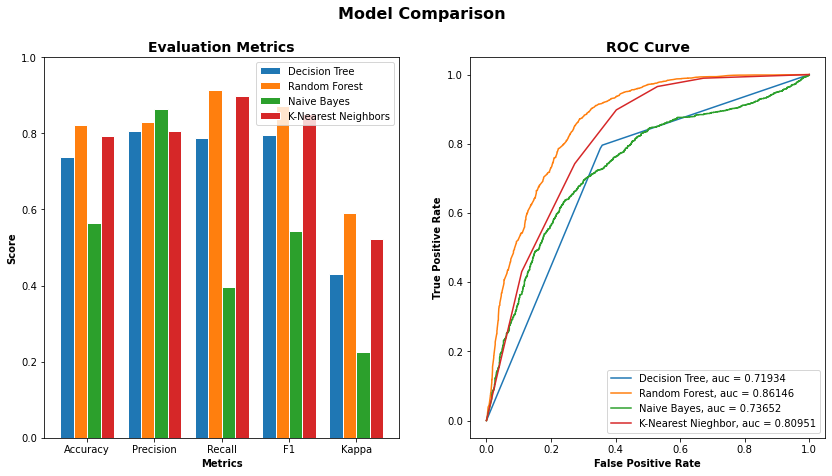

In [32]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

## Model Optmization

In [33]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 500}

In [34]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.8262578616352201
Precision: 0.8203508771929825
Recall: 0.9393330654881479
F1 Score: 0.8758194418430418
Cohens Kappa Score: 0.5910320894928878
Area Under Curve: 0.8690102313025844
Confusion Matrix:
 [[ 815  512]
 [ 151 2338]]
